# **GLM**

In [ ]:
pip install -U numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
pip install -U shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import shap
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve, confusion_matrix, roc_curve, average_precision_score

def log_reg(train_data, test_data):

  # Splitting data
  X_train = train_data.drop("fraud", axis= 1)
  y_train = train_data["fraud"]
  X_test = test_data.drop("fraud", axis= 1)
  y_test = test_data["fraud"]


  # fit the GLM model using LogisticRegression from SKlearn
  glm = LogisticRegression(solver= 'liblinear')
  glm.fit(X_train, y_train)


  # Testing Set
  test_prob = glm.predict_proba(X_test)[:, 1]


  # Get the ROC curve and calculate the ROC AUC
  roc_auc = roc_auc_score(y_test, test_prob)


  # Get the PR curve
  precision, recall, thresholds = precision_recall_curve(y_test, test_prob)


  # Get the PR AUC
  pr_auc = average_precision_score(y_test, test_prob)


  # Set threshold bases on the optimal ROC curve threshold
  fpr, tpr, thresholds = roc_curve(y_test, test_prob)
  threshold = thresholds[np.argmax(tpr - fpr)]


  # Create Binary predictions
  model_glm_test_pred = np.where(test_prob > threshold, 1, 0)


  # Confusion Matrix
  c_m = confusion_matrix(y_test, model_glm_test_pred)


  # Printing all the outputs
  print(f" Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : {roc_auc}")
  print(f" Area Under the Precision Recall Curve (PR AUC) : {pr_auc}")
  print(f" Confusion Matrix : \n{c_m}")


  fig = px.area(x= fpr, y=tpr, title= f'ROC Curve (AUC={auc(fpr, tpr):.4f})', labels= dict(x= 'Specificity', y= 'Sensitivity'), width= 700, height= 500)
  fig.add_shape( type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1 )

  fig.update_yaxes(scaleanchor="x", scaleratio=1)
  fig.update_xaxes(constrain='domain')
  fig.show()

  return  glm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adasyn_wo_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/adasyn_wo_triggers_train.csv")
adasyn_wo_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/adasyn_wo_triggers_test.csv")

adasyn_w_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/adasyn_w_triggers_train.csv")
adasyn_w_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/adasyn_w_triggers_test.csv")


smote_wo_triggers_train= pd.read_csv("/content/drive/MyDrive/Data/smote_wo_triggers_train.csv")
smote_wo_triggers_test= pd.read_csv("/content/drive/MyDrive/Data/smote_wo_triggers_test.csv")

smote_w_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/smote_w_triggers_train.csv")
smote_w_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/smote_w_triggers_test.csv")

mwmote_wo_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/mwmote_wo_triggers_train.csv")
mwmote_wo_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/mwmote_wo_triggers_test.csv")

mwmote_w_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/mwmote_w_triggers_train.csv")
mwmote_w_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/mwmote_w_triggers_test.csv")

rose_wo_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/rose_wo_triggers_train.csv")
rose_wo_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/rose_wo_triggers_test.csv")

rose_w_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/rose_w_triggers_train.csv")
rose_w_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/rose_w_triggers_test.csv")

In [ ]:
features=list(adasyn_w_triggers_test.drop("fraud", axis= 1).columns.values)
features

['birth_date',
 'no_of_days_stayed',
 'medical_service_provider_idHOSP3P10675',
 'medical_service_provider_idHOSP3P53909',
 'medical_service_provider_idHOSP3P16665',
 'primary_procedure_codeM100068',
 'medical_service_provider_idHOSP3P89205',
 'medical_service_provider_idHOSP3G59614',
 'hospital_locations.a.s_nagar',
 'medical_service_provider_idHOSP3G81986',
 'medical_service_provider_idHOSP3P12536',
 'hospital_locationbarnala',
 'medical_service_provider_idHOSP3P93201',
 'hospital_locationfatehgarh_sahib',
 'hospital_locationsri_muktsar_sahib',
 'hospital_locationrupnagar',
 'medical_service_provider_idHOSP3P68582',
 'hospital_locationkapurthala',
 'hospital_locationshahid_bhagat_singh_nagar',
 'hospital_locationfazilka',
 'medical_service_provider_idHOSP3P20747',
 'approved_allowed_amount',
 'primary_procedure_codeM100008',
 'hospital_locationbathinda',
 'primary_procedure_codeM100009',
 'primary_procedure_codeS100214',
 'categoryTraders.Familes',
 'hospital_locationmoga',
 'primary

# ADASYN

## ADASYN Without Triggers

In [ ]:
logmodel=log_reg(adasyn_wo_triggers_train, adasyn_wo_triggers_test)


 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7423976425156382
 Area Under the Precision Recall Curve (PR AUC) : 0.7168142881408571
 Confusion Matrix : 
[[18949 12855]
 [ 5606 26201]]


### SHAP -adasyn without triggers

In [ ]:
x=adasyn_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = adasyn_wo_triggers_test.drop("fraud", axis= 1)
shap_values_awot = explainer.shap_values(X_test)

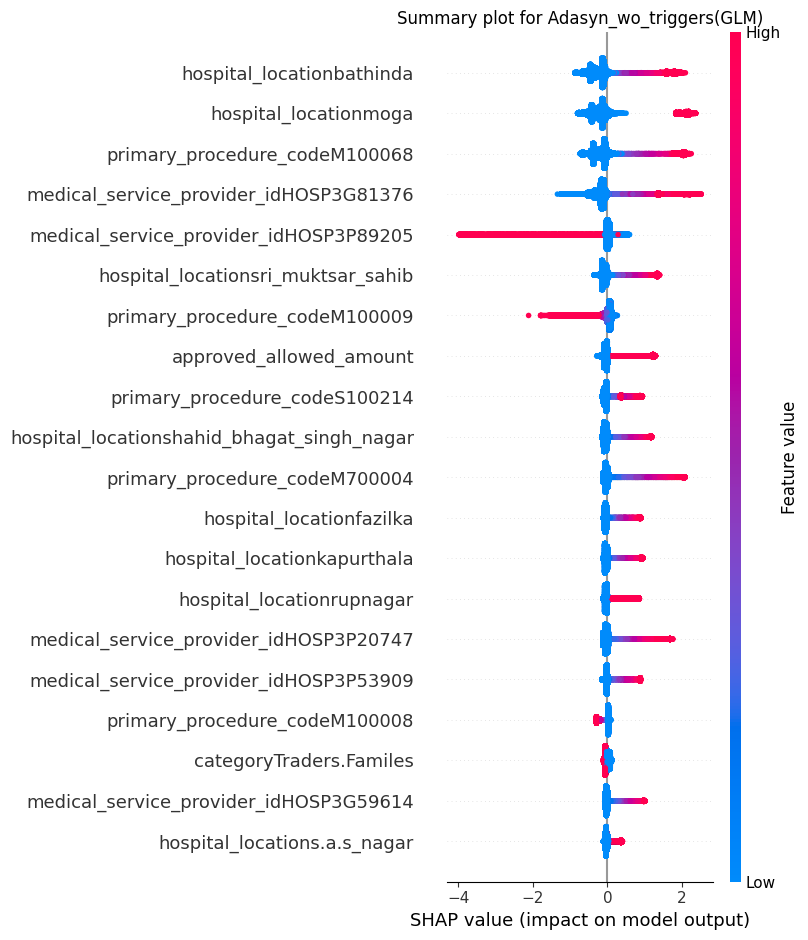

In [ ]:
plt.title("Summary plot for Adasyn_wo_triggers(GLM)")
shap.summary_plot(shap_values_awot, X_test, feature_names=features)

## ADASYN with Triggers

In [ ]:
logmodel_awt=log_reg(adasyn_w_triggers_train, adasyn_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7829250084066475
 Area Under the Precision Recall Curve (PR AUC) : 0.7870437327905841
 Confusion Matrix : 
[[24492  7312]
 [10577 21260]]


## Shap - adasyn with triggers

In [ ]:
x=adasyn_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_awt, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = adasyn_w_triggers_test.drop("fraud", axis= 1)
shap_values_awt = explainer.shap_values(X_test)

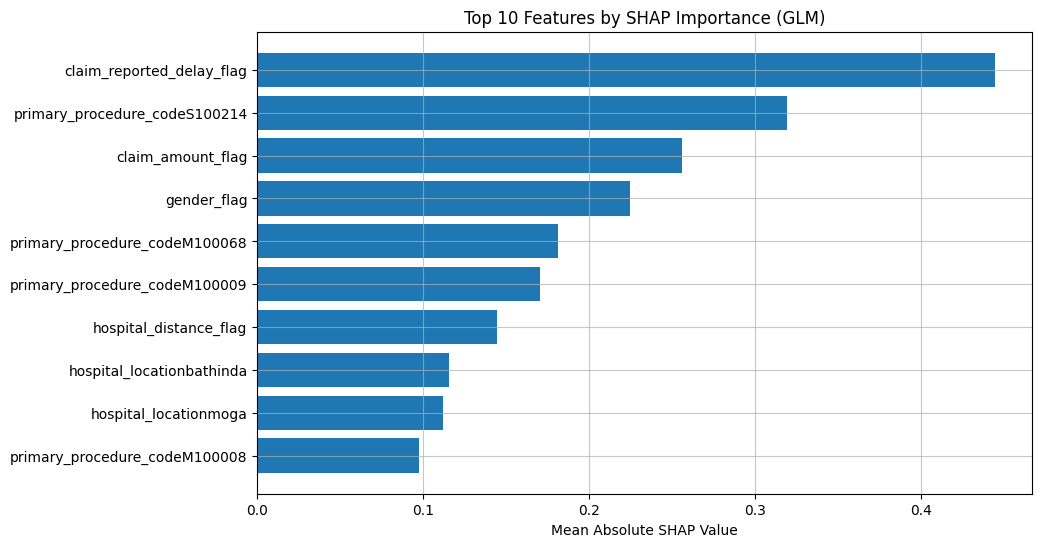

In [ ]:
mean_shap_values = np.abs(shap_values_awt).mean(0)
feature_names = X_test.columns

top_10_indices = np.argsort(mean_shap_values)[-10:]
top_10_feature_names = feature_names[top_10_indices]
top_10_mean_shap_values = mean_shap_values[top_10_indices]

# Create a bar plot to display mean SHAP values for the top 10 features
plt.figure(figsize=(10, 6))
plt.grid(True, axis='x', linestyle='-', alpha=0.7)
plt.grid(True, axis='y', linestyle='-', alpha=0.7)
plt.barh(range(len(top_10_feature_names)), top_10_mean_shap_values, tick_label=top_10_feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 10 Features by SHAP Importance (GLM)')

# Display the plot
plt.show()

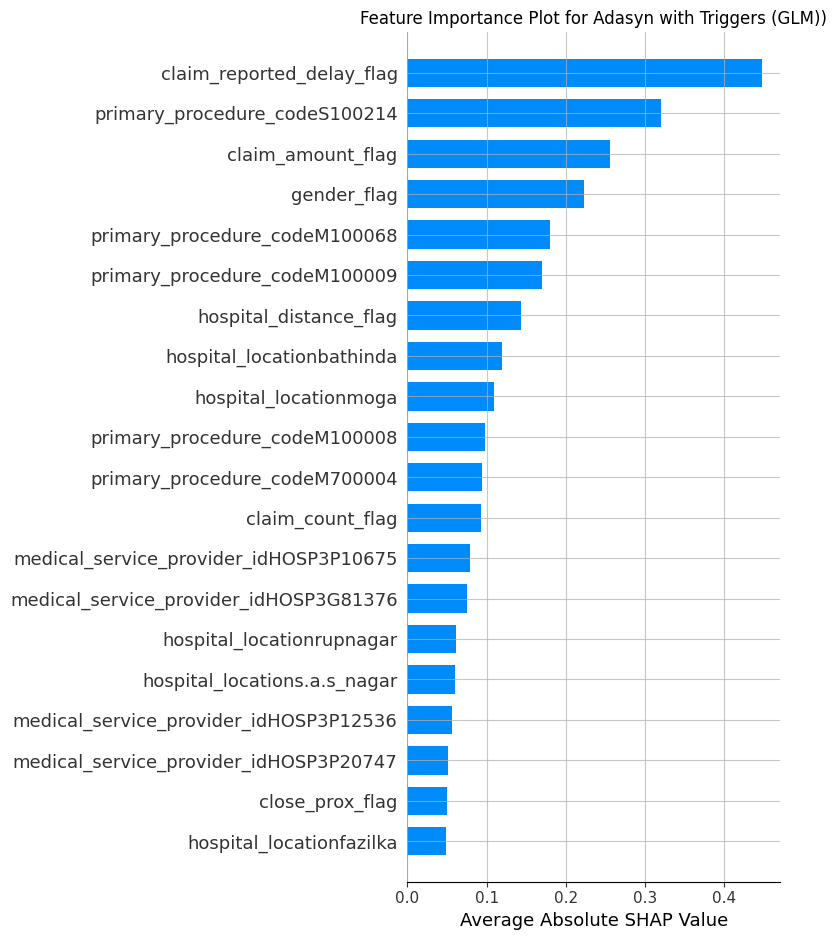

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid(True, axis='x', linestyle='-', alpha=0.7)
plt.grid(True, axis='y', linestyle='-', alpha=0.7)
# Plot feature importance
plt.title("Feature Importance Plot for Adasyn with Triggers (GLM))")
shap.summary_plot(shap_values_awt, X_test, plot_type='bar' ,show=False)
plt.xlabel('Average Absolute SHAP Value')
plt.show()

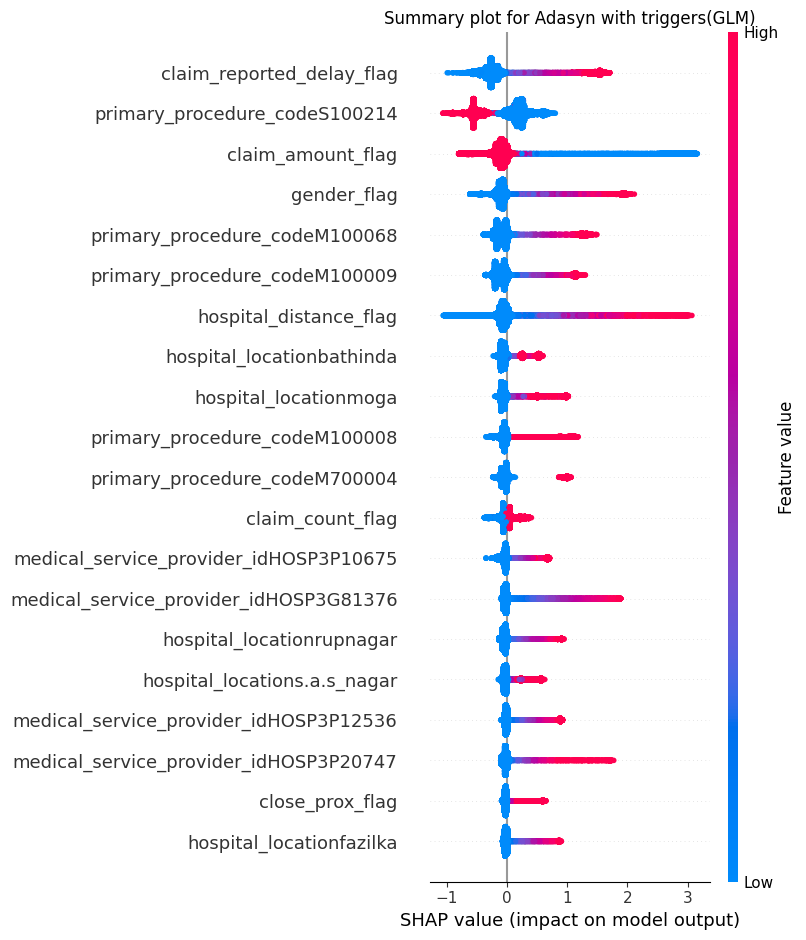

In [ ]:
plt.title("Summary plot for Adasyn with triggers(GLM)")
shap.summary_plot(shap_values_awt, X_test, feature_names=features)

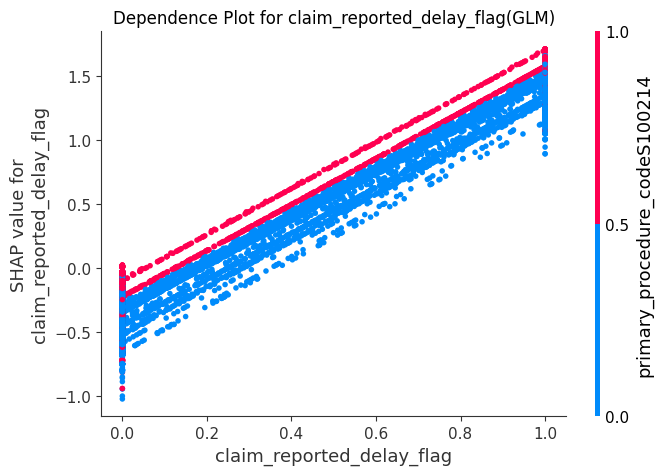

In [ ]:
shap.dependence_plot('claim_reported_delay_flag', shap_values_awt, X_test, show=False)
plt.title("Dependence Plot for claim_reported_delay_flag(GLM)")
plt.show()

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values_awt[0,:], X_test.iloc[0,:])


ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning


# SMOTE

## SMOTE without Triggers

In [ ]:
logmodel_swot=log_reg(smote_wo_triggers_train, smote_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7452651509237875
 Area Under the Precision Recall Curve (PR AUC) : 0.6113836814087406
 Confusion Matrix : 
[[23876  7928]
 [ 7440 10686]]


## SHAP- smote without Triggers

In [ ]:
x=smote_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_swot, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = smote_wo_triggers_test.drop("fraud", axis= 1)
shap_values_swot = explainer.shap_values(X_test)

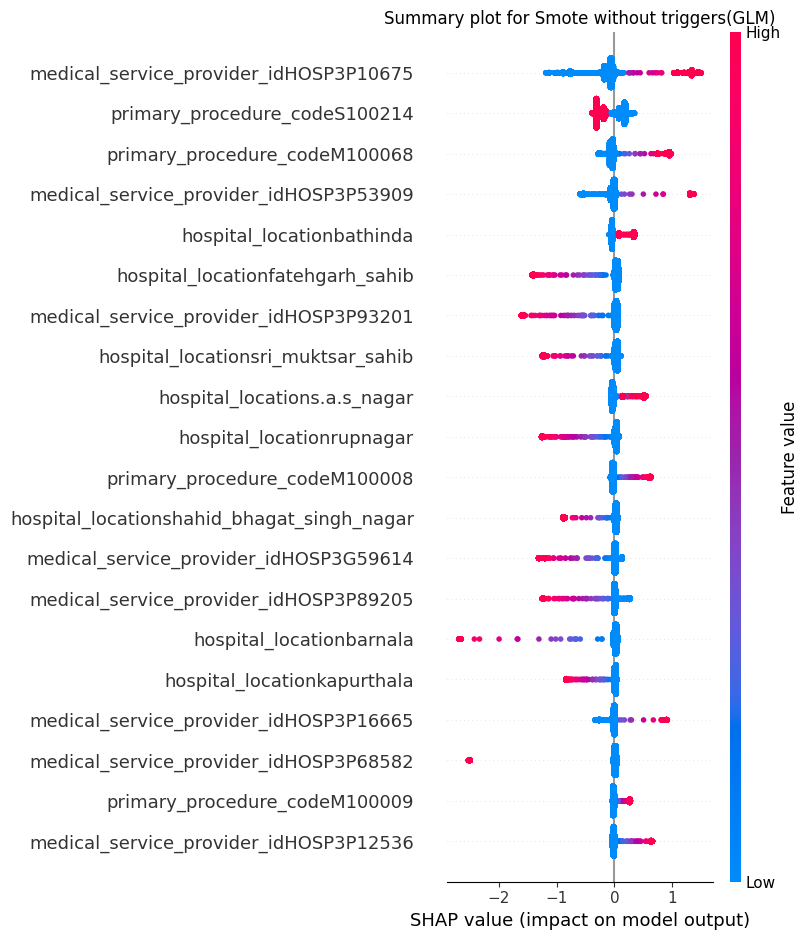

In [ ]:
plt.title("Summary plot for Smote without triggers(GLM)")
shap.summary_plot(shap_values_swot, X_test, feature_names=features)

## SMOTE with Triggers

In [ ]:
logmodel_swt=log_reg(smote_w_triggers_train, smote_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.8732978998670176
 Area Under the Precision Recall Curve (PR AUC) : 0.8185849767493703
 Confusion Matrix : 
[[27527  4277]
 [ 4389 13737]]


### SHAP - Smote with Triggers

In [ ]:
x=smote_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_swt, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = smote_w_triggers_test.drop("fraud", axis= 1)
shap_values_swt = explainer.shap_values(X_test)

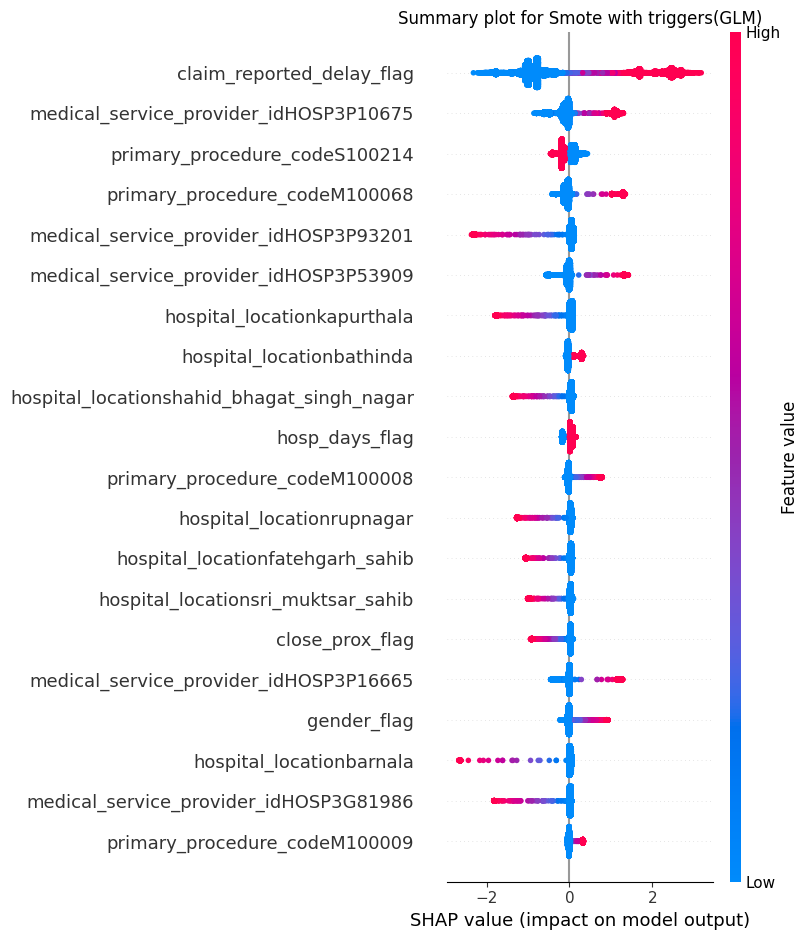

In [ ]:
plt.title("Summary plot for Smote with triggers(GLM)")
shap.summary_plot(shap_values_swt, X_test, feature_names=features)

# MWMOTE

## MWMOTE without Triggers

In [ ]:
logmodel_mwot=log_reg(mwmote_wo_triggers_train, mwmote_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7335488533235759
 Area Under the Precision Recall Curve (PR AUC) : 0.7157924972408588
 Confusion Matrix : 
[[15232 16572]
 [ 4328 27476]]


### SHAP- mwmote without triggers

In [ ]:
x=mwmote_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_mwot, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = mwmote_wo_triggers_test.drop("fraud", axis= 1)
shap_values_mwot = explainer.shap_values(X_test)

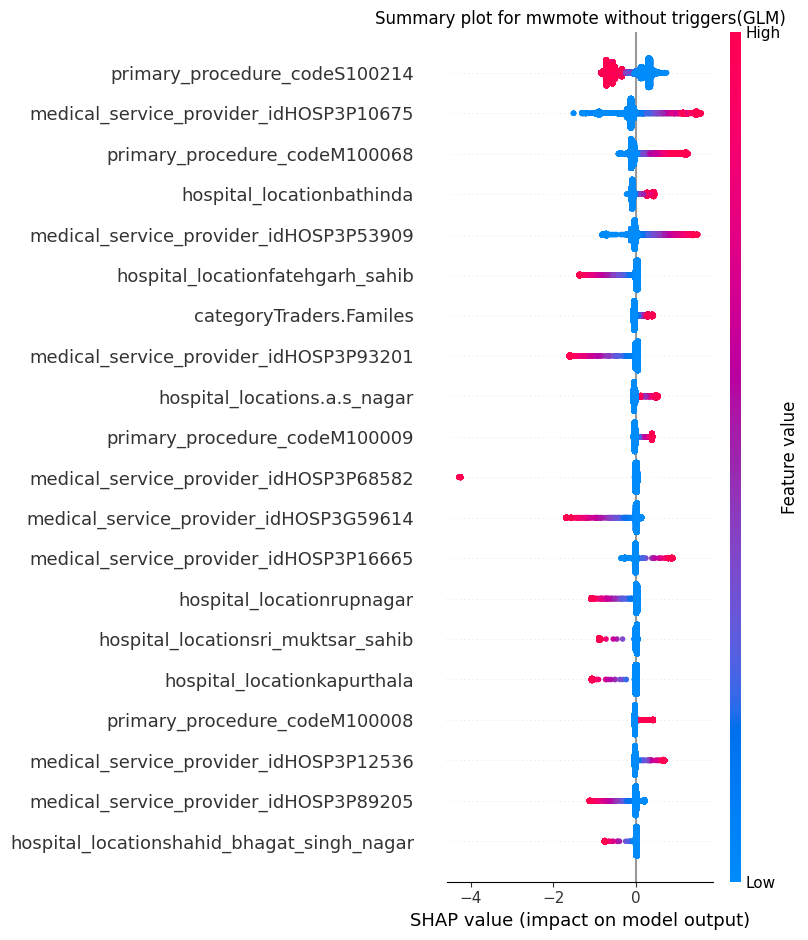

In [ ]:
plt.title("Summary plot for mwmote without triggers(GLM)")
shap.summary_plot(shap_values_mwot, X_test, feature_names=features)

## MWOTE with Triggers

In [ ]:
logmodel_mwt=log_reg(mwmote_w_triggers_train, mwmote_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.910106404383749
 Area Under the Precision Recall Curve (PR AUC) : 0.9050831759439405
 Confusion Matrix : 
[[27173  4631]
 [ 5363 26441]]


### SHAP - Mwmote with triggers

In [ ]:
x=mwmote_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_mwt, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = mwmote_w_triggers_test.drop("fraud", axis= 1)
shap_values_mwt = explainer.shap_values(X_test)

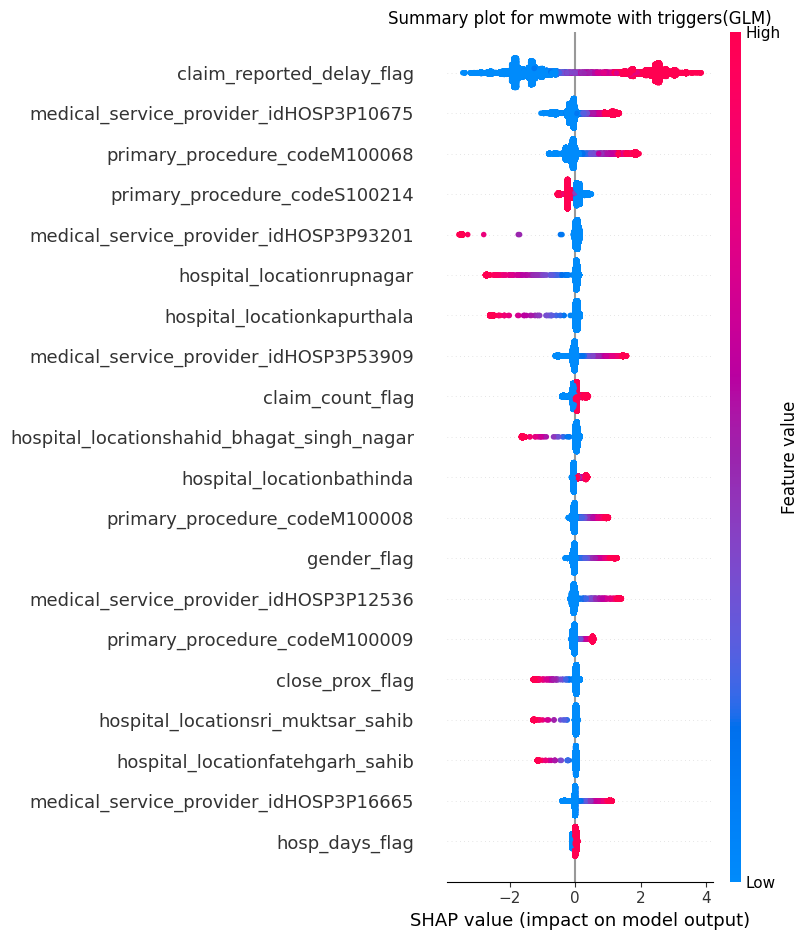

In [ ]:
plt.title("Summary plot for mwmote with triggers(GLM)")
shap.summary_plot(shap_values_mwt, X_test, feature_names=features)

# ROSE

## ROSE without Triggers

In [ ]:
logmodel_rwot=log_reg(rose_wo_triggers_train, rose_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7370104344698627
 Area Under the Precision Recall Curve (PR AUC) : 0.7242303532980874
 Confusion Matrix : 
[[23794  8010]
 [13188 18616]]


## SHAP - rose without triggers

In [ ]:
x=rose_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_rwot, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = rose_wo_triggers_test.drop("fraud", axis= 1)
shap_values_rwot = explainer.shap_values(X_test)

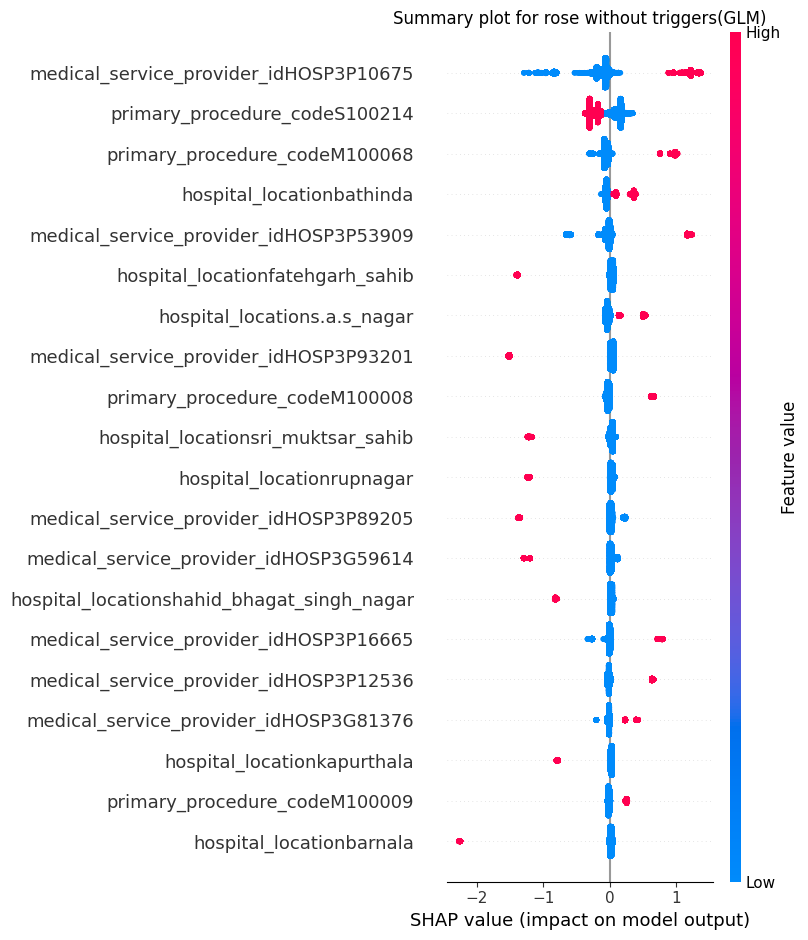

In [ ]:
plt.title("Summary plot for rose without triggers(GLM)")
shap.summary_plot(shap_values_rwot, X_test, feature_names=features)

## ROSE with Triggers

In [ ]:
logmodel_rwt=log_reg(rose_w_triggers_train, rose_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.8637057334975935
 Area Under the Precision Recall Curve (PR AUC) : 0.874440347568567
 Confusion Matrix : 
[[28606  3198]
 [ 8853 22951]]


### SHAP - rose with triggers

In [ ]:
x=rose_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(logmodel_rwt, masker=shap.maskers.Impute(data=x),
                           feature_names=x.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test = rose_w_triggers_test.drop("fraud", axis= 1)
shap_values_rwt = explainer.shap_values(X_test)

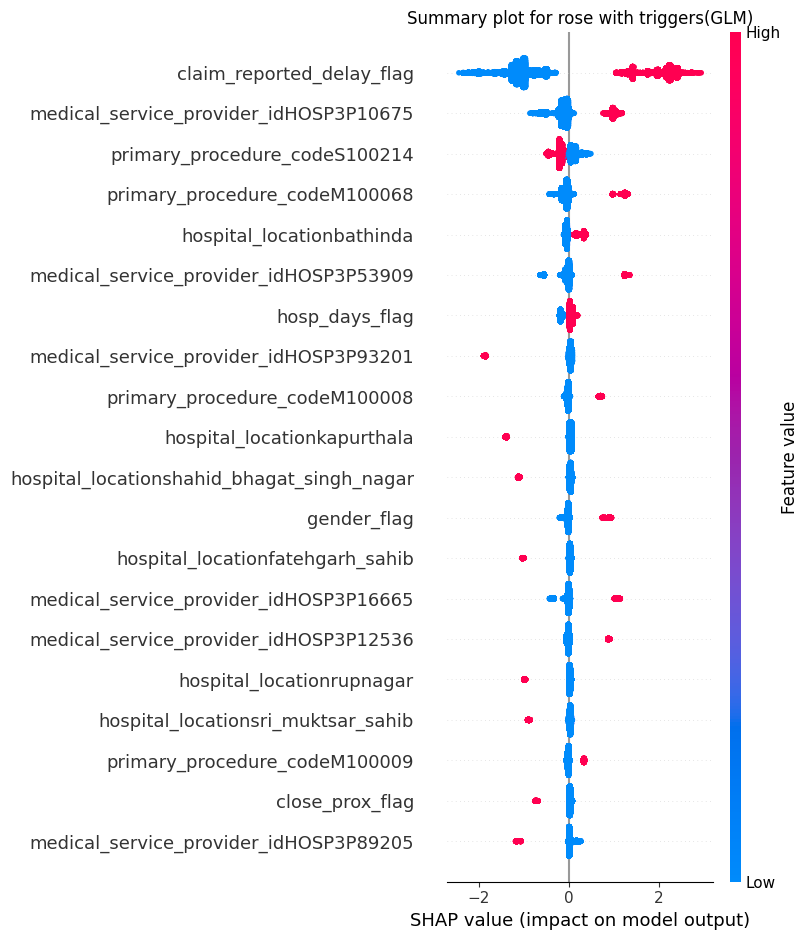

In [ ]:
plt.title("Summary plot for rose with triggers(GLM)")
shap.summary_plot(shap_values_rwt, X_test, feature_names=features)

# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, roc_curve,average_precision_score, auc

def naive_bayes(train_data, test_data):

    # Splitting data
    X_train = train_data.drop("fraud", axis= 1)
    y_train = train_data["fraud"]
    X_test = test_data.drop("fraud", axis= 1)
    y_test = test_data["fraud"]


    # fit the Multimonial Naive Bayes model from SKlearn
    model = MultinomialNB()
    model.fit(X_train, y_train)


    # Testing Set
    test_prob = model.predict_proba(X_test)[:, 1]


    # Get the ROC curve and calculate the ROC AUC
    roc_auc = roc_auc_score(y_test, test_prob)
    # print(f"roc_auc: {roc_auc}")


    # Get the PR curve
    precision, recall, thresholds = precision_recall_curve(y_test, test_prob)


    # Get the PR AUC
    pr_auc = average_precision_score(y_test, test_prob)
    # print(f"pr_auc:  {pr_auc}")


    # Set threshold bases on the optimal ROC curve threshold
    fpr, tpr, thresholds = roc_curve(y_test, test_prob)
    threshold = thresholds[np.argmax(tpr - fpr)]


    # Create Binary predictions
    model_nb_test_pred = np.where(test_prob > threshold, 1, 0)


    # Confusion Matrix
    c_m = confusion_matrix(y_test, model_nb_test_pred)
    # print(f"CM:\n{c_m}")


    # Printing all the outputs
    print(f" Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : {roc_auc}")
    print(f" Area Under the Precision Recall Curve (PR AUC) : {pr_auc}")
    print(f" Confusion Matrix : \n{c_m}")


    fig = px.area(x= fpr, y=tpr, title= f"Naive Bayes' ROC Curve (AUC={auc(fpr, tpr):.4f})", labels= dict(x= 'Specificity', y= 'Sensitivity'), width= 700, height= 500)
    fig.add_shape( type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1 )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

    return model

# ADASYN

## ADASYN without Triggers

In [ ]:
nb_awot = naive_bayes(adasyn_wo_triggers_train, adasyn_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.6682008090536078
 Area Under the Precision Recall Curve (PR AUC) : 0.66789588447352
 Confusion Matrix : 
[[24687  7117]
 [12137 19670]]


### SHAP- Adasyn without triggers

In [ ]:
x=adasyn_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_awot.predict,x)

In [ ]:
X_test = adasyn_wo_triggers_test.drop("fraud", axis= 1)
shap_values_awot = explainer.shap_values(X_test)

Permutation explainer: 63612it [18:14, 57.79it/s]                           


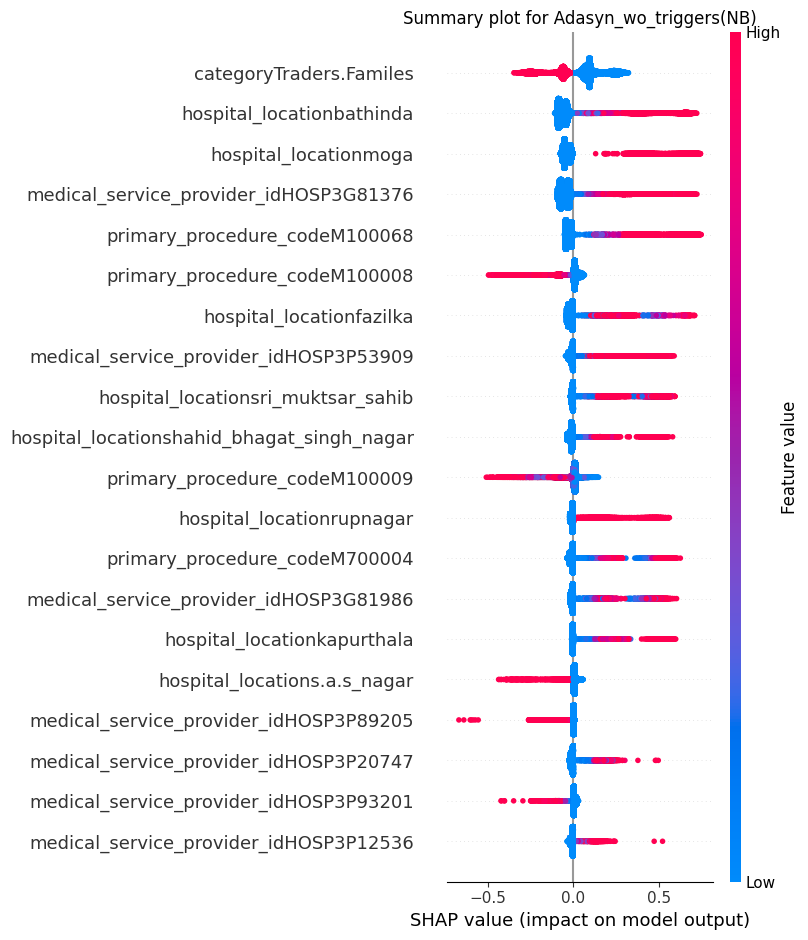

In [ ]:
plt.title("Summary plot for Adasyn_wo_triggers(NB)")
shap.summary_plot(shap_values_awot, X_test, feature_names=features)

## ADASTN with triggers

In [ ]:
nb_awt = naive_bayes(adasyn_w_triggers_train, adasyn_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7523804379106317
 Area Under the Precision Recall Curve (PR AUC) : 0.7585378981659461
 Confusion Matrix : 
[[21143 10661]
 [ 7768 24069]]


### SHAP-adasyn with triggers

In [ ]:
x=adasyn_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_awt.predict,x)

In [ ]:
X_test = adasyn_w_triggers_test.drop("fraud", axis= 1)
shap_values_awt = explainer.shap_values(X_test)

Permutation explainer: 63642it [21:36, 48.80it/s]                           


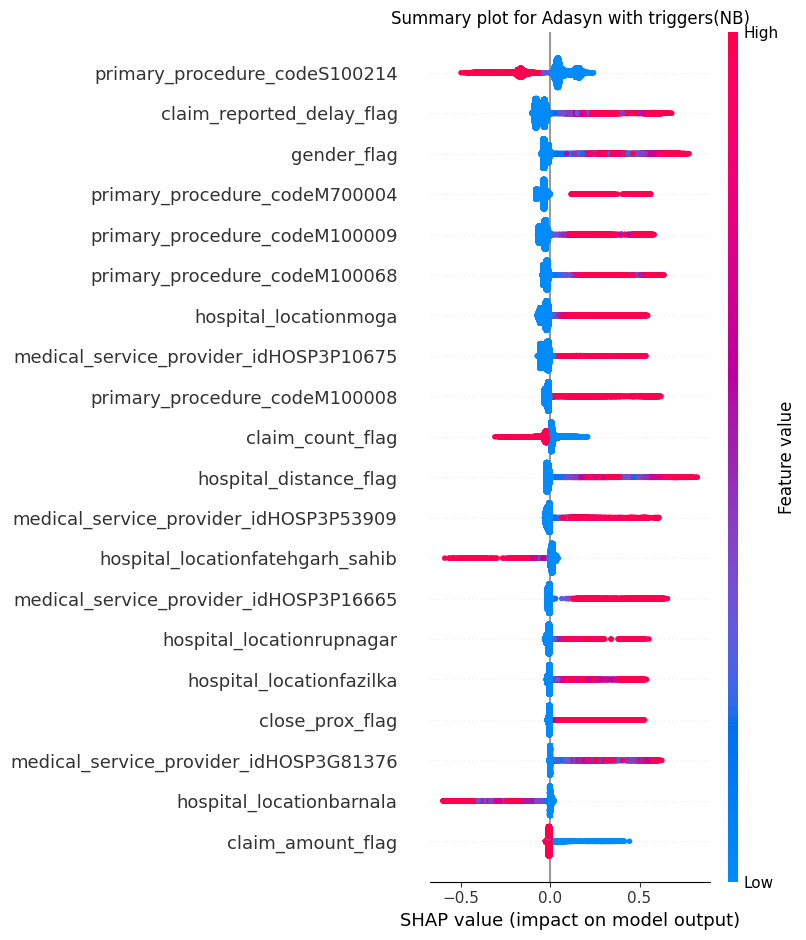

In [ ]:
plt.title("Summary plot for Adasyn with triggers(NB)")
shap.summary_plot(shap_values_awt, X_test, feature_names=features)

# SMOTE

## SMOTE without triggers

In [ ]:
nb_swot = naive_bayes(smote_wo_triggers_train, smote_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.6986678527838357
 Area Under the Precision Recall Curve (PR AUC) : 0.5678448618471947
 Confusion Matrix : 
[[13755 18049]
 [ 3023 15103]]


### SHAP- smote without triggers

In [ ]:
x=smote_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_swot.predict,x)

In [ ]:
X_test = smote_wo_triggers_test.drop("fraud", axis= 1)
shap_values_swot = explainer.shap_values(X_test)

Permutation explainer: 49931it [14:58, 54.98it/s]                           


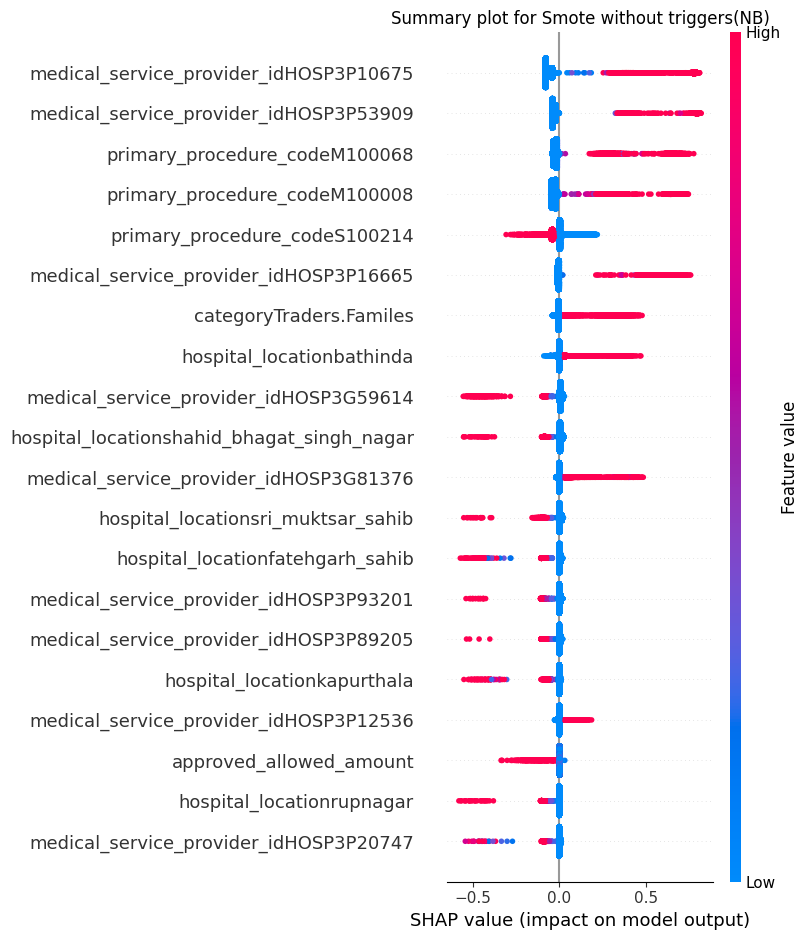

In [ ]:
plt.title("Summary plot for Smote without triggers(NB)")
shap.summary_plot(shap_values_swot, X_test, feature_names=features)

## SMOTE with triggers

In [ ]:
nb_swt = naive_bayes(smote_w_triggers_train, smote_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.8509398153519836
 Area Under the Precision Recall Curve (PR AUC) : 0.7927589925051794
 Confusion Matrix : 
[[27452  4352]
 [ 5066 13060]]


### SHAP- smote with triggers

In [ ]:
x=smote_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_swt.predict,x)

In [ ]:
X_test = smote_w_triggers_test.drop("fraud", axis= 1)
shap_values_swt = explainer.shap_values(X_test)

Permutation explainer: 49931it [19:35, 42.22it/s]                           


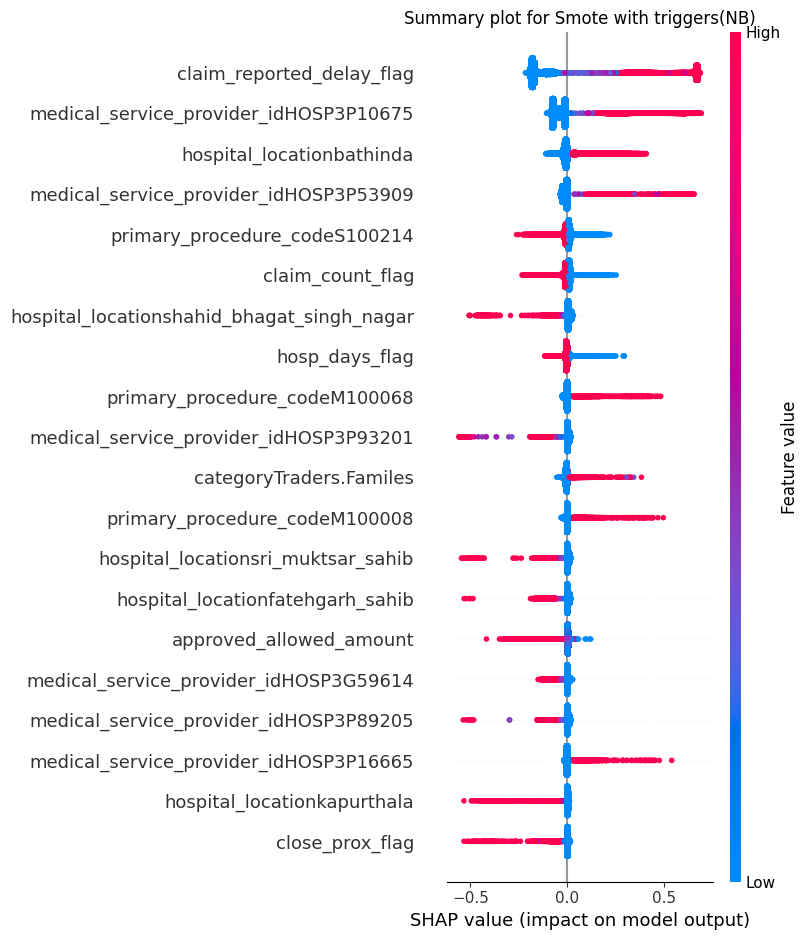

In [ ]:
plt.title("Summary plot for Smote with triggers(NB)")
shap.summary_plot(shap_values_swt, X_test, feature_names=features)

# MWMOTE

## MWMOTE without Triggers

In [ ]:
nb_mwot = naive_bayes(mwmote_wo_triggers_train, mwmote_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.7292734456380825
 Area Under the Precision Recall Curve (PR AUC) : 0.7024199783704294
 Confusion Matrix : 
[[14276 17528]
 [ 2827 28977]]


### SHAP- mwmote without triggers

In [ ]:
x=mwmote_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_mwot.predict,x)

In [ ]:
X_test = mwmote_wo_triggers_test.drop("fraud", axis= 1)
shap_values_mwot = explainer.shap_values(X_test)

Permutation explainer: 63609it [19:03, 55.17it/s]


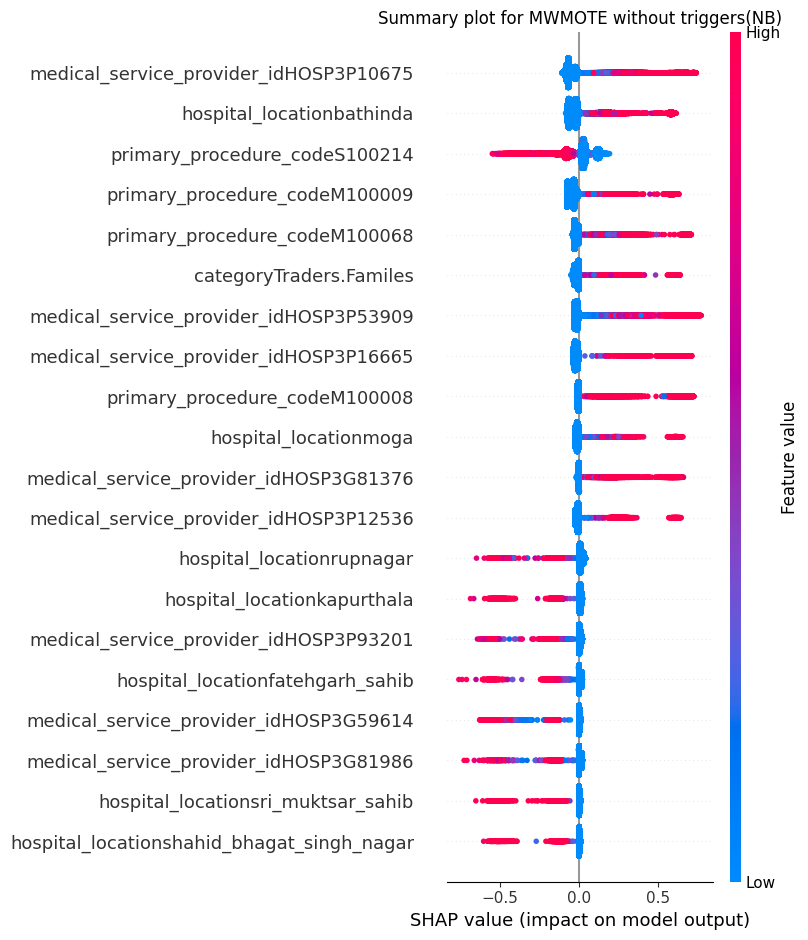

In [ ]:
plt.title("Summary plot for MWMOTE without triggers(NB)")
shap.summary_plot(shap_values_mwot, X_test, feature_names=features)

## MWMOTE with Triggers

In [ ]:
nb_mwt = naive_bayes(mwmote_w_triggers_train, mwmote_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.8914711487641074
 Area Under the Precision Recall Curve (PR AUC) : 0.8917831576866175
 Confusion Matrix : 
[[27764  4040]
 [ 6306 25498]]


### SHAP- mwmote with triggers

In [ ]:
x=mwmote_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_mwt.predict,x)

In [ ]:
X_test = mwmote_w_triggers_test.drop("fraud", axis= 1)
shap_values_mwt = explainer.shap_values(X_test)

Permutation explainer: 63609it [25:19, 41.50it/s]                           


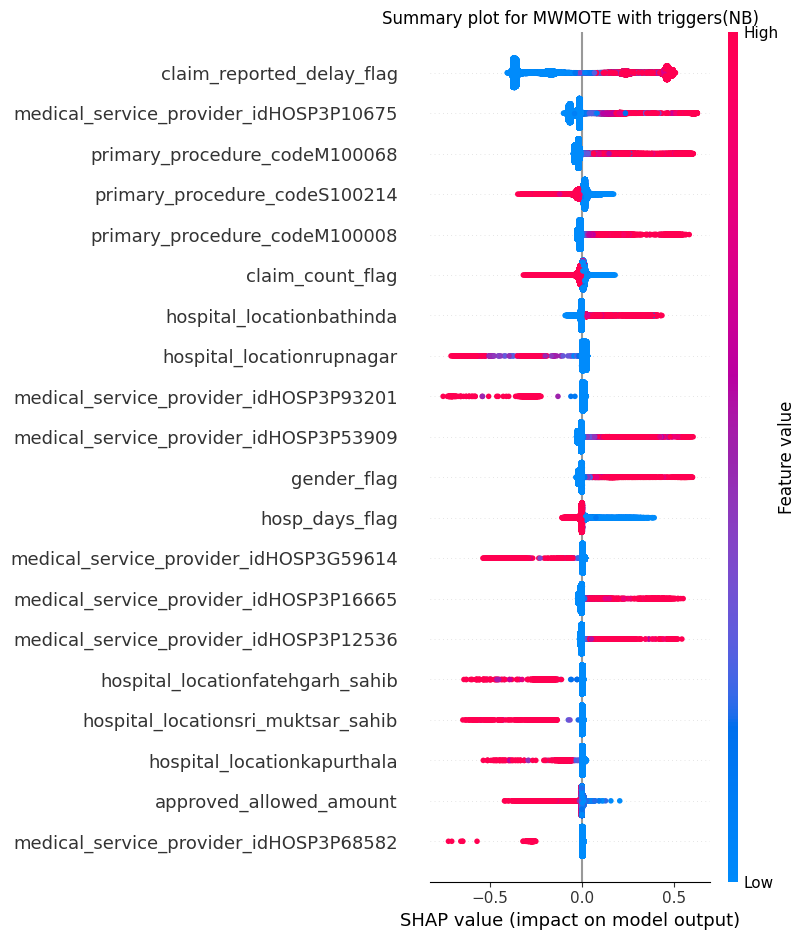

In [ ]:
plt.title("Summary plot for MWMOTE with triggers(NB)")
shap.summary_plot(shap_values_mwt, X_test, feature_names=features)

# ROSE

## ROSE wihtout Triggers

In [ ]:
nb_rwot = naive_bayes(rose_wo_triggers_train,rose_wo_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.6910499810411211
 Area Under the Precision Recall Curve (PR AUC) : 0.6865052142679812
 Confusion Matrix : 
[[13674 18130]
 [ 5547 26257]]


### SHAP - rose without Triggers

In [ ]:
x=rose_wo_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_rwot.predict,x)

In [ ]:
X_test = rose_wo_triggers_test.drop("fraud", axis= 1)
shap_values_rwot = explainer.shap_values(X_test)

Permutation explainer: 63609it [21:21, 49.21it/s]                           


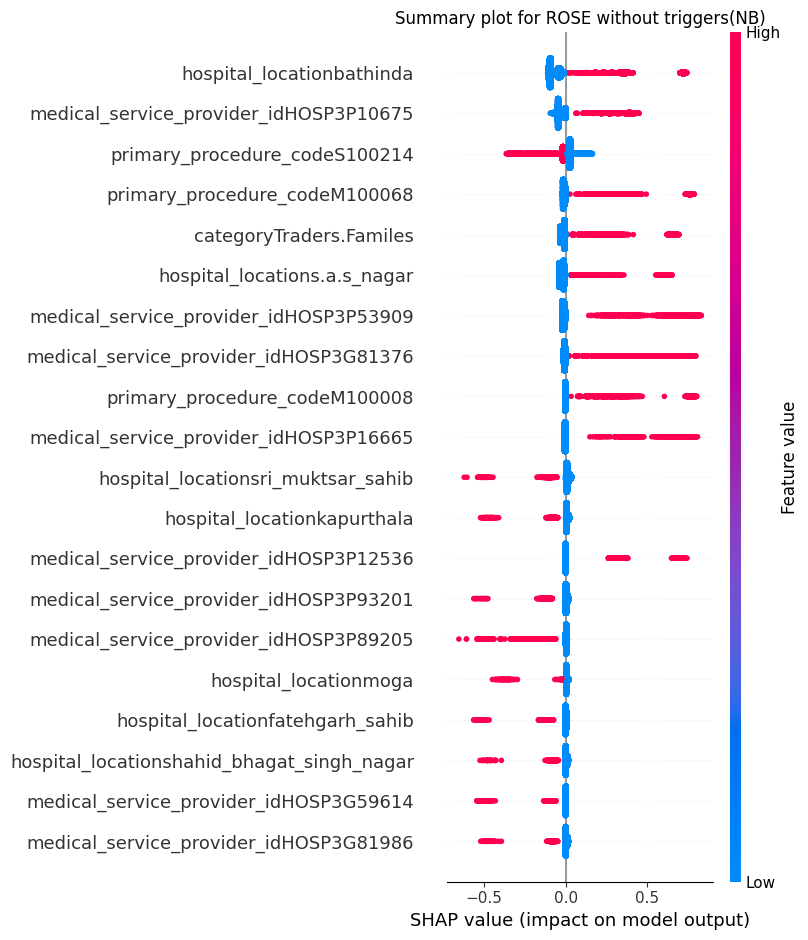

In [ ]:
plt.title("Summary plot for ROSE without triggers(NB)")
shap.summary_plot(shap_values_rwot, X_test, feature_names=features)

## ROSE with Triggers

In [ ]:
nb_rwt = naive_bayes(rose_w_triggers_train,rose_w_triggers_test)

 Area Under the Curve and Receiver Operating Characterstics Curve (AUC ROC) : 0.8440034467773078
 Area Under the Precision Recall Curve (PR AUC) : 0.8564052338003674
 Confusion Matrix : 
[[27299  4505]
 [ 9025 22779]]


### SHAP- rose with triggers

In [ ]:
x=rose_w_triggers_train.drop("fraud", axis= 1)

explainer = shap.Explainer(nb_rwt.predict,x)

In [ ]:
X_test = rose_w_triggers_test.drop("fraud", axis= 1)
shap_values_rwt = explainer.shap_values(X_test)

Permutation explainer: 63609it [25:12, 41.84it/s]


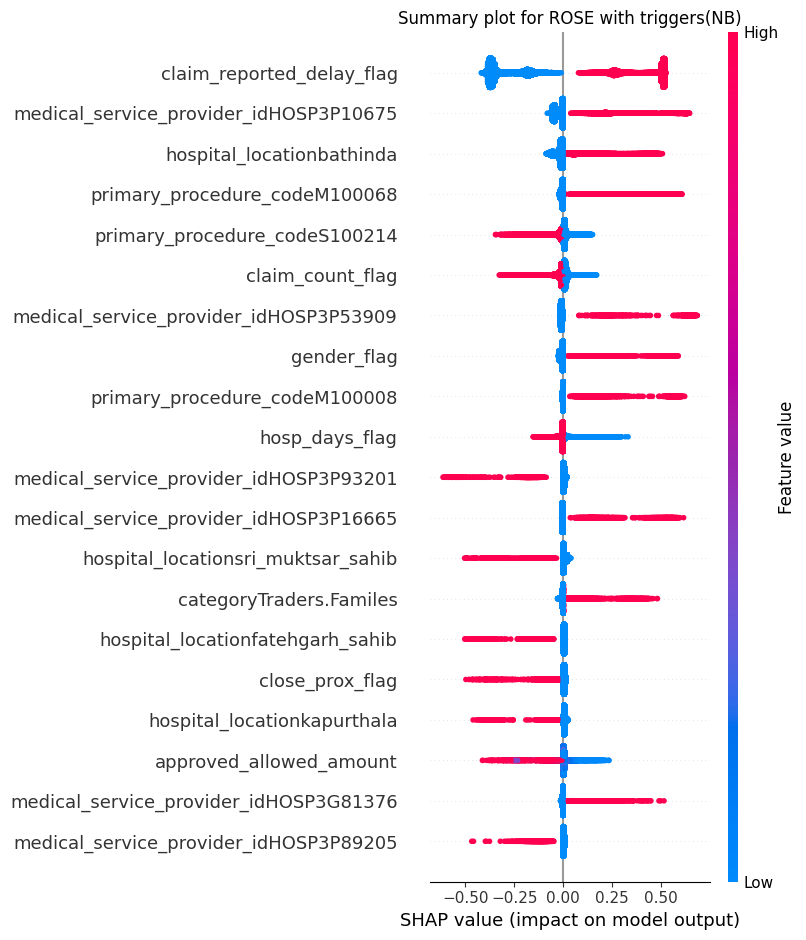

In [ ]:
plt.title("Summary plot for ROSE with triggers(NB)")
shap.summary_plot(shap_values_rwt, X_test, feature_names=features)